In [18]:
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import re

#load the .mat file into a dictionary
#extract the variable B005 from the loaded .mat file
mat_db0005 = sio.loadmat('redifined_dataset/B0005.mat') ['B0005']
mat_db0006 = sio.loadmat('redifined_dataset/B0006.mat') ['B0006']
mat_db0025 = sio.loadmat('redifined_dataset/B0025.mat') ['B0025']
mat_db0029 = sio.loadmat('redifined_dataset/B0029.mat') ['B0029']
mat_db0030 = sio.loadmat('redifined_dataset/B0030.mat') ['B0030']
mat_db0045 = sio.loadmat('redifined_dataset/B0045.mat') ['B0045']
mat_db0046 = sio.loadmat('redifined_dataset/B0046.mat') ['B0046']

In [ ]:
for i in id_list:
    mat_db_int =[int(j) for j in id_list]
    mat_db_int = mat_db = sio.loadmat('redifined_dataset/B0005.mat') ['B0005']
    

In [19]:
def to_df(mat_db):
    """Returns one pd.DataFrame per cycle type"""
    #cycle type: charge, discharge, impedance

    # Features common for every cycle
    cycles_cols = ['type', 'ambient_temperature', 'time']

    # Features monitored during the cycle
    features_cols = {
        'discharge': ['Voltage_measured', 'Current_measured', 'Temperature_measured', 
                'Current_charge', 'Voltage_charge', 'Time'],
        'charge': ['Voltage_measured', 'Current_measured', 'Temperature_measured', 
                    'Current_charge', 'Voltage_charge', 'Time', 'Capacity'],
        'impedance': ['Sense_current', 'Battery_current', 'Current_ratio',
                    'Battery_impedance', 'Rectified_impedance', 'Re', 'Rct']
    }

    # Define one pd.DataFrame per cycle type
    #Create an empty Pandas DataFrame for each cycle type defined in features_cols
    df = {key: pd.DataFrame() for key in features_cols.keys()}

    # Get every cycle
    print(f'Number of cycles: {mat_db[0][0][0].shape[1]}')
    cycles = [[row.flat[0] for row in line] for line in mat_db[0][0][0][0]]

    # Get measures for every cycle
    for cycle_id, cycle_data in enumerate(cycles):
        tmp = pd.DataFrame() #store data for the current cycle

        # Data series for every cycle
        #Retrieve the data series for the current cycle from the last element of cycle_data
        features_x_cycle = cycle_data[-1]

        # Get features for the specific cycle type
        features = features_cols[cycle_data[0]]
        
        for feature, data in zip(features, features_x_cycle):
            if len(data[0]) > 1:
                # Correct number of records
                tmp[feature] = data[0]
            else:
                # Single value, so assign it to all rows
                tmp[feature] = data[0][0]
        
        # Add columns common to the cycle measurements
        tmp['id_cycle'] = cycle_id
        for k, col in enumerate(cycles_cols):
            tmp[col] = cycle_data[k]
        
        # Append cycle data to the right pd.DataFrame
        cycle_type = cycle_data[0]
        #The original used method was append, but it was deprecated 
        #It is repalced by pandas.concat
        df[cycle_type] = pd.concat([df[cycle_type], tmp], ignore_index=True)
    
    return df
    

In [34]:
dfs0005 = to_df(mat_db0005)
dfs0006 = to_df(mat_db0006)
dfs0025 = to_df(mat_db0025)
dfs0029 = to_df(mat_db0029)
dfs0030 = to_df(mat_db0030)
dfs0045 = to_df(mat_db0045)
dfs0046 = to_df(mat_db0046)

dfs0045['charge'].head(10)

Number of cycles: 616
Number of cycles: 616
Number of cycles: 80
Number of cycles: 97
Number of cycles: 97
Number of cycles: 184
Number of cycles: 184


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,id_cycle,type,ambient_temperature,time
0,3.701651,0.000471,6.201578,-0.002,0.003,0.000,2,charge,4,2010.0
1,3.993490,1.510523,6.207667,1.498,4.742,2.594,2,charge,4,2010.0
2,4.015771,1.511073,6.225381,1.498,4.785,8.922,2,charge,4,2010.0
3,4.030107,1.511056,6.248588,1.500,4.796,15.234,2,charge,4,2010.0
4,4.042280,1.510530,6.272890,1.500,4.812,21.516,2,charge,4,2010.0
5,4.052917,1.510517,6.303806,1.498,4.818,27.797,2,charge,4,2010.0
6,4.062690,1.512205,6.333328,1.500,4.829,34.125,2,charge,4,2010.0
7,4.071953,1.510846,6.364233,1.500,4.839,40.438,2,charge,4,2010.0
8,4.080371,1.509668,6.395810,1.498,4.845,46.719,2,charge,4,2010.0
9,4.088773,1.510740,6.445836,1.498,4.856,53.000,2,charge,4,2010.0


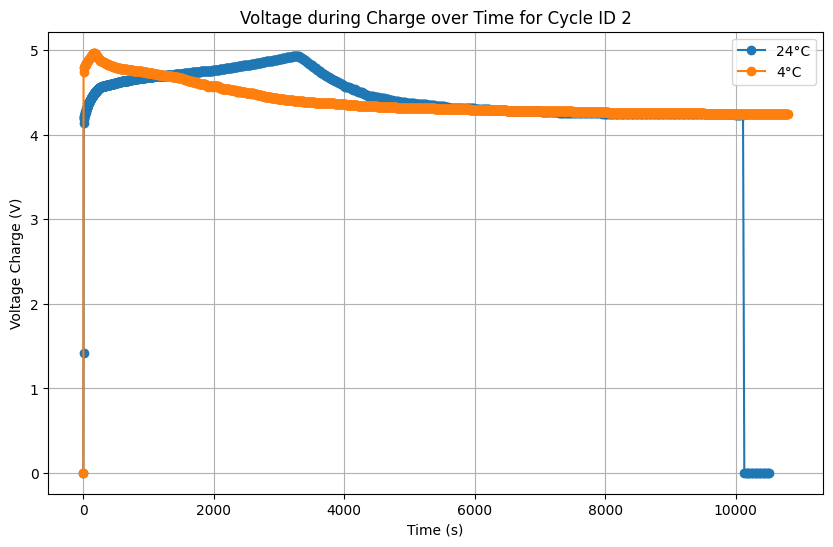

In [52]:
cycle_id_to_plot = 2  
charge_df0005 = dfs0005['charge']
selected_cycle_0005 = charge_df0005[charge_df0005['id_cycle'] == cycle_id_to_plot]

charge_df0045 = dfs0045['charge']
selected_cycle_0045 = charge_df0045[charge_df0045['id_cycle'] == cycle_id_to_plot]

# Plot Voltage_measured over Time for the selected cycle
plt.figure(figsize=(10, 6))
plt.plot(selected_cycle_0005['Time'], selected_cycle_0005['Voltage_charge'], marker='o', linestyle='-', label='24°C')
plt.plot(selected_cycle_0045['Time'], selected_cycle_0045['Voltage_charge'], marker='o', linestyle='-', label= '4°C')
plt.title(f'Voltage during Charge over Time for Cycle ID {cycle_id_to_plot}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage Charge (V)')
plt.grid()
plt.legend()
plt.show()

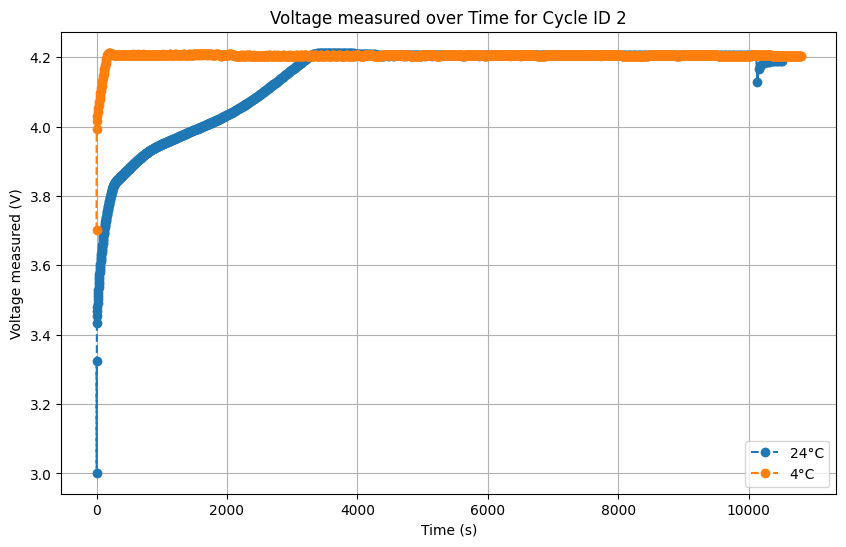

In [50]:
cycle_id_to_plot = 2  
charge_df0005 = dfs0005['charge']
selected_cycle_0005 = charge_df0005[charge_df0005['id_cycle'] == cycle_id_to_plot]

charge_df0045 = dfs0045['charge']
selected_cycle_0045 = charge_df0045[charge_df0045['id_cycle'] == cycle_id_to_plot]

# Plot Voltage_charge over Time for the selected cycle
plt.figure(figsize=(10, 6))
plt.plot(selected_cycle_0005['Time'], selected_cycle_0005['Voltage_measured'], marker='o', linestyle='--', label='24°C')
plt.plot(selected_cycle_0045['Time'], selected_cycle_0045['Voltage_measured'], marker='o', linestyle='--', label= '4°C')
plt.title(f'Voltage measured over Time for Cycle ID {cycle_id_to_plot}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage measured (V)')
plt.grid()
plt.legend()
plt.show()

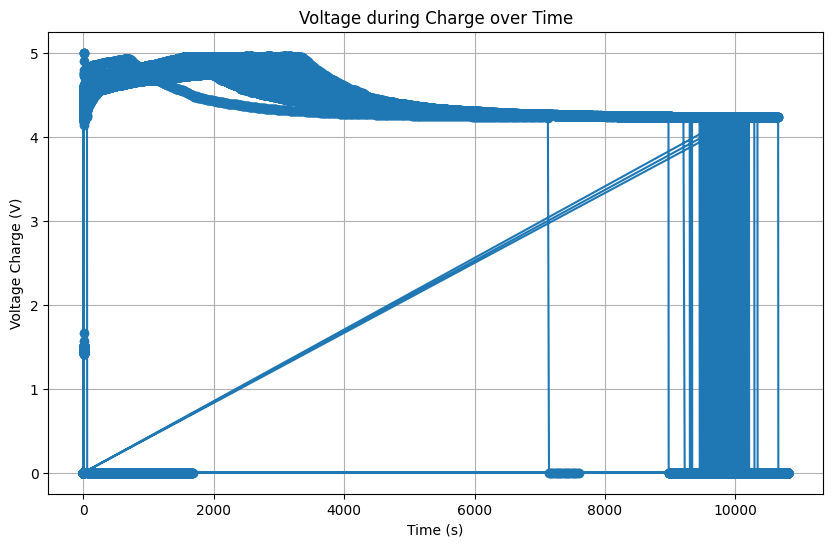

In [42]:
# Plot Voltage_charge over Time for charge cycles
charge_df0005 = dfs0005['charge']
charge_df0046 = dfs0046['charge']

plt.figure(figsize=(10, 6))
plt.plot(charge_df0005['Time'], charge_df0005['Voltage_charge'], marker='o', linestyle='-')
plt.title('Voltage during Charge over Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage Charge (V)')
plt.grid()
plt.show()

In [ ]:
#The plot indicates a rapid increase in voltage followed by a plateau, which is typical for charging.

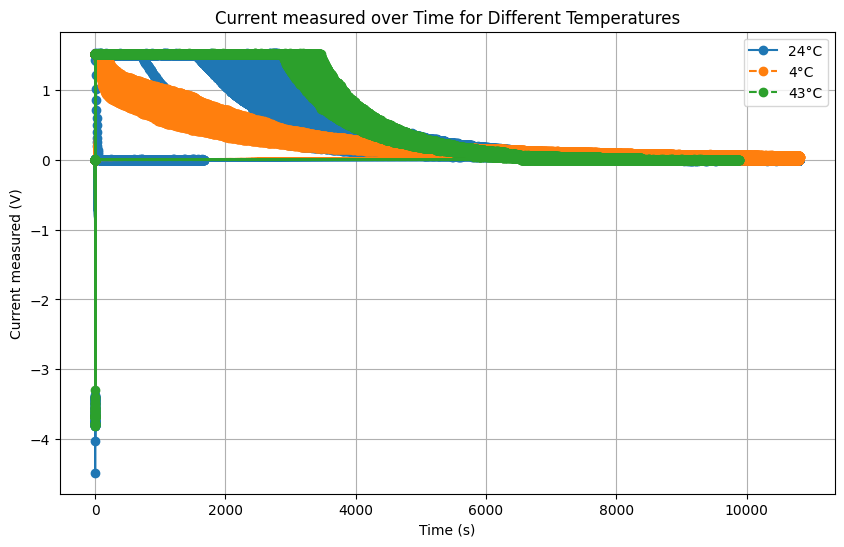

In [45]:
charge_df0005 = dfs0005['charge'] #temp = 24°C#
charge_df0045 = dfs0045['charge'] #temp = 4°C
charge_df0030 = dfs0030['charge'] #temp = 43°C

plt.figure(figsize=(10, 6))

# Plotting for 24°C
plt.plot(charge_df0005['Time'], charge_df0005['Current_measured'], marker='o', linestyle='-', label='24°C')

# Plotting for 4°C
plt.plot(charge_df0045['Time'], charge_df0045['Current_measured'], marker='o', linestyle='--', label='4°C')

#Plotting for 43°C
plt.plot(charge_df0030['Time'], charge_df0030['Current_measured'], marker='o', linestyle='--', label='43°C') 

plt.title('Current measured over Time for Different Temperatures')
plt.xlabel('Time (s)')
plt.ylabel('Current measured (V)')
plt.grid()
plt.legend()
plt.show()

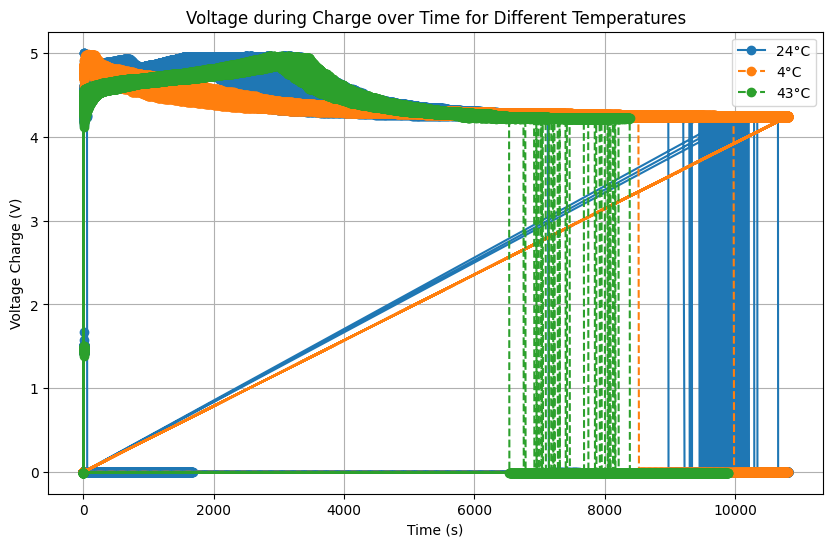

In [44]:
cycle_id_to_plot = 0  
charge_df0005 = dfs0005['charge'] #temp = 24°C#
charge_df0045 = dfs0045['charge'] #temp = 4°C
charge_df0030 = dfs0030['charge'] #temp = 43°C

plt.figure(figsize=(10, 6))

# Plotting for 24°C
plt.plot(charge_df0005['Time'], charge_df0005['Voltage_charge'], marker='o', linestyle='-', label='24°C')

# Plotting for 4°C
plt.plot(charge_df0045['Time'], charge_df0045['Voltage_charge'], marker='o', linestyle='--', label='4°C')

#Plotting for 43°C
plt.plot(charge_df0030['Time'], charge_df0030['Voltage_charge'], marker='o', linestyle='--', label='43°C') 

plt.title('Voltage during Charge over Time for Different Temperatures')
plt.xlabel('Time (s)')
plt.ylabel('Voltage Charge (V)')
plt.grid()
plt.legend()
plt.show()

In [12]:
dfs['discharge'].tail(10)

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,id_cycle,type,ambient_temperature,time
5924,3.723512,-0.003927,13.800770,0.0004,0.0,1610.547,58,discharge,4,2010.0
5925,3.725538,-0.004759,13.737293,0.0004,0.0,1621.454,58,discharge,4,2010.0
5926,3.727474,-0.004164,13.544136,0.0004,0.0,1632.391,58,discharge,4,2010.0
5927,3.729227,-0.004491,13.246243,0.0004,0.0,1643.297,58,discharge,4,2010.0
5928,3.731000,-0.004520,13.217434,0.0004,0.0,1654.282,58,discharge,4,2010.0
5929,3.732600,-0.003068,12.971872,0.0004,0.0,1665.172,58,discharge,4,2010.0
5930,3.734241,-0.004138,12.870139,0.0004,0.0,1676.110,58,discharge,4,2010.0
5931,3.735807,-0.005340,12.817266,0.0004,0.0,1686.985,58,discharge,4,2010.0
5932,3.737421,-0.002259,12.648285,0.0004,0.0,1697.844,58,discharge,4,2010.0
5933,3.738739,-0.004159,12.545432,0.0004,0.0,1708.860,58,discharge,4,2010.0


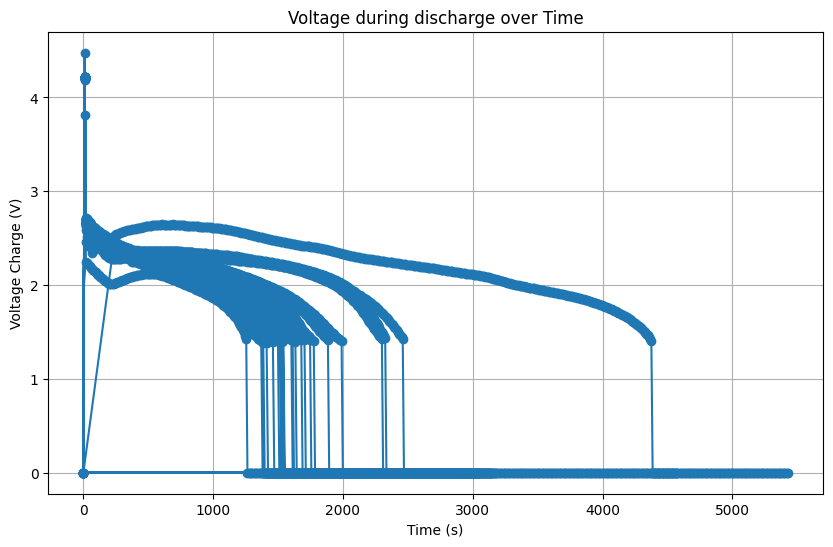

In [14]:
# Plot Voltage_charge over Time for discharge cycle
discharge_df = dfs['discharge']

plt.figure(figsize=(10, 6)) #width is 10 inches and height is 6 inches
plt.plot(discharge_df['Time'], discharge_df['Voltage_charge'], marker='o', linestyle='-')
plt.title('Voltage during discharge over Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage Charge (V)')
plt.grid()
plt.show()

In [ ]:
#SoC estimation
#SoC is estimated using the voltage and current data over time.


In [10]:
# Save each dataframe to a CSV file
dfs['discharge'].to_csv('discharge_data.csv', index=False)
dfs['charge'].to_csv('charge_data.csv', index=False)
dfs['impedance'].to_csv('impedance_data.csv', index=False)

In [38]:
impedance_df0005 = dfs0005['impedance']
impedance_df0005.head(10)

,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_impedance,Re,Rct,id_cycle,type,ambient_temperature,time
0,-1.0000000+1.0000000j,-1.0000000+1.0000000j,1.000000+0.000000j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
1,820.609497-36.234550j,337.091461-82.920776j,2.320415+0.463305j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
2,827.242188-48.231228j,330.631561-70.013718j,2.424193+0.367465j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
3,827.193481-56.195717j,330.808624-61.734425j,2.447002+0.286778j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
4,824.929504-53.241478j,332.682678-57.629013j,2.434305+0.261646j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
5,824.959167-62.825409j,333.561005-49.793083j,2.446781+0.176901j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
6,824.055908-61.669991j,335.273010-50.344555j,2.430679+0.181051j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
7,822.727295-66.035019j,334.791901-44.279137j,2.440820+0.125578j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
8,822.407410-65.799271j,338.487885-44.111298j,2.413987+0.120196j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0
9,821.634644-65.822723j,337.377594-43.389069j,2.420415+0.116181j,-0.438926-0.107298j,0.070069-0.000480j,0.044669,0.069456,40,impedance,24,2008.0


The State of Health (SoH) is a measure of the battery's current capacity relative to its nominal capacity, and it decreases as the battery undergoes charge-discharge cycles. This degradation is monitored using either charge or discharge data. 

SOH = 𝑄𝑛𝑜𝑤/𝑄𝑓𝑢𝑙𝑙

where 𝑄𝑛𝑜𝑤 and 𝑄𝑓𝑢𝑙𝑙 represent the batteries’ current available capacity after n charge/discharge cycles and initial capacity, respectively.

State-of-the-art SOH estimation algorithms can be broadly categorized into model-based methods and data-driven methods1. Model-based techniques use estimation algorithms such as Kalman filter to estimate SOH from equivalent circuit model of the battery. Data-driven methods use regular charge or discharge data and corresponding SOH to train machine learning models.
In the case of data-driven models and according to the study provided in this link: https://www.mdpi.com/1996-1073/16/14/5414, charge cycles in the NASA dataset can more accurately reflect battery aging than discharge cycles.
